# US09 - As a GSM, I want to know the exact costs referring to water consumption of specific green space so that I may manage these expenses efficiently.

# Introduction

Efficiently managing water consumption costs in green spaces is crucial for sustainability and cost-effectiveness. User Story 09 (US09) aims to analyze water consumption data from "water consumption.csv" to achieve several outcomes:

#### Barplot of Monthly Water Consumption: 
    -Visualize monthly water consumption, customizable by year, time period, and park identification.

#### Average Monthly Costs: 
    -Calculate average monthly costs for water consumption per park.

#### Statistical Comparison: 
    -Compare statistical indicators between parks with the highest and lowest water consumption, including mean, median, standard deviation, coefficient of skewness, and identify outliers.

This analysis provides insights for park managers to optimize water usage and associated costs sustainably.

# Code and Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
import seaborn as sns

# ---------------------------Validation Methods---------------------------
# Method Year exists
def year_exists(year):
    return any(water_consumption['Year'] == year)

# Method Park exists
def park_exists(park):
    return any(water_consumption['Park'] == park)

# Method Start Month Valid
def startMonthValid(monthSt_input):
    return monthSt_input > 0 and monthSt_input < 12

# Method End Month Valid
def endMonthValid(monthSt_input,monthEnd_input):
    return monthEnd_input > monthSt_input and monthEnd_input <= 12

# Method to validate if the park number input is greater than zero
def nParks_Validation(nParks):
    return nParks > 0 # checks if it is greater than zero

# Method to check if the park name exists in the file
def parksIdent_Validation(parkIdent, water_consumption):         
    return parkIdent.upper() in set(water_consumption['Park'].str.upper())

# ---------------------------Input Methods---------------------------
# Method Year Input
def yearInput():
    while True:
        year_input = int(input('Year: '))

        if(year_exists(year_input)) :
            return year_input
        else:
            print('->Dados Invalidos!')


# Method Park Input
def parkInput():
    while True:
        park_input = input('Park: ')

        if(park_exists(park_input)) :
            return park_input
        else:
            print('\n->Dados Invalidos!')

# Method Start Month Input
def monthStartInput():
    while True:
        monthSt_input = int(input('Start Month: '))

        if(startMonthValid(monthSt_input)) :
            return monthSt_input
        else:
            print('\n->Mês Invalidos!')

# Method End Month Input
def monthEndInput(monthSt_input):
    while True:
        monthEnd_input = int(input('End Month: '))

        if(endMonthValid(monthSt_input,monthEnd_input)) :
            return monthEnd_input
        else:
            print('\n->Mês Invalidos!')
            

# Method for the user to enter park numbers
def nParks_Input():
    while True:
        try:
            nParks = int(input("Number of Parks: "))
            if nParks_Validation(nParks):
                return nParks
            else:
                print('Invalid input! Number of parks should be greater than 0.')
        except ValueError:
            print('Invalid input! Please enter an integer value.')

# Method for the user to enter park Identificacion
def parksIdent_Input(x, water_consumption):
    while True:
        parkIdent = input(f'({x + 1}) Park identification: ')
        if parksIdent_Validation(parkIdent, water_consumption):
            return parkIdent
        else:
            print('Invalid park identification! Please enter a valid one.')

# Method for calculating monthly costs and their percentage
def calculate_cost(consumption):
    base_cost_per_m3 = 0.7  # Base cost per m3
    additional_fee = 0.15    # Additional fee for consumption over 1000m3/month
    threshold = 1000         # Consumption threshold
    
    if consumption <= threshold:
        return consumption * base_cost_per_m3
    else:
        base_cost = threshold * base_cost_per_m3
        additional_cost = (consumption - threshold) * (base_cost_per_m3 * (1 + additional_fee))
        return base_cost + additional_cost
            
#BarPlot Generate   
def barPlotGenerateAlt_One(monthly_data,park_input):
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_data['Month'], monthly_data['Consumption'])
    plt.title(f'{park_input} Park Monthly Water Consumption')
    plt.xlabel('Month')
    plt.ylabel('Consumption')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
#BarPlot Generate   
def barPlotGenerateAlt_Two(monthly_data,park_input):
    nameMonths = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

    nMonths = np.arange(1, 13)

    Consumption = np.zeros(12)  # Inicialmente todos os valores são zero
    Consumption[monthly_data['Month'] - 1] = monthly_data['Consumption']  # Substitui os valores conhecidos pelos valores reais

    plt.figure(figsize=(10, 6))
    plt.bar(nMonths, Consumption, tick_label=nameMonths)

    plt.title(f'{parkEdent} Park Monthly Water Consumption')
    plt.xlabel('Month')
    plt.ylabel('Consumption')
    plt.tight_layout()
    plt.show()
    

def detect_outliers(park_data):
    """
    Detect outliers in consumption data for a park.
    
    Parameters:
        park_data (DataFrame): Data for the park.
    """
    # Calculate median and interquartile range (IQR)
    median = park_data['Consumption'].median()
    q1 = park_data['Consumption'].quantile(0.25)
    q3 = park_data['Consumption'].quantile(0.75)
    iqr = q3 - q1
    
    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Detect outliers
    outliers = park_data[(park_data['Consumption'] < lower_bound) | (park_data['Consumption'] > upper_bound)]
    
    if not outliers.empty:
        print("\nOutliers detected:")
        print(outliers)
    else:
        print("\nNo outliers detected.")

def calculate_info(park_data):
    """
    Calculate consumption statistics for a park.
    
    Parameters:
        park_data (DataFrame): Data for the park.
    """
    # Calculate consumption statistics for the park
    mean = park_data['Consumption'].mean()
    median = park_data['Consumption'].median()
    std = park_data['Consumption'].std()
    skewness = skew(park_data['Consumption'])

    # Define column headers for statistics
    header = ['Statistic', 'Value']
    # Define data rows
    data = [
        ['Mean', f'{mean:.2f}'],
        ['Median', f'{median:.2f}'],
        ['Standard Deviation', f'{std:.2f}'],
        ['Coefficient of Skewness', f'{skewness:.2f}']
    ]
    
    # Calculate column widths for formatting
    col_widths = [max(len(row[i]) for row in data) for i in range(len(header))]
    # Print consumption statistics
    park_name = park_data['Park'].iloc[0]  # Get the park name from the first row
    
    print(f"\nConsumption Statistics for the Park ({park_name}):")
    print(" | ".join(header))
    print("-" * (sum(col_widths) + len(header) * 3 - 1))
    
    for row in data:
        print(" | ".join(row[i].ljust(col_widths[i]) for i in range(len(row))))

def calculate_frequency(min_consumption, max_consumption, park_data, park_name):
    """
    Calculate frequency information for consumption data for a specific park.
    
    Parameters:
        min_consumption (float): Minimum consumption value.
        max_consumption (float): Maximum consumption value.
        park_data (DataFrame): Data for the park.
        park_name (str): Name of the park.
    """
    
    # Define class intervals
    class_size = (max_consumption - min_consumption) / 5
    bins = [min_consumption + i * class_size for i in range(6)]  # Changed range to 6  
    
    # Copy data to avoid modifying the original dataframe
    park_data = park_data.copy()
    
    # Bin data into consumption classes for the park
    park_data.loc[:, 'Consumption Class'] = pd.cut(park_data['Consumption'], bins, include_lowest=False, right=True)
    
    # Calculate absolute and relative frequency tables
    absolute_frequency_table = park_data['Consumption Class'].value_counts().sort_index()
    total_observations = len(park_data)
    relative_frequency_table = absolute_frequency_table / total_observations
    
    # Print frequency tables
    print(f'\n\nFrequency Tables for the Park ({park_name}):')
    print("Absolute Frequency Table:")
    print(absolute_frequency_table)
    print("\nRelative Frequency Table:")
    print(relative_frequency_table)
    
def generate_histogram(park_data, bins,color):
    """
    Generate a histogram for consumption data of a park.
    
    Parameters:
        park_data (DataFrame): Data for the park.
        bins (int): Number of bins for the histogram.
    """
    # Plot histogram for the park
    plt.figure(figsize=(10, 6))
    plt.hist(park_data['Consumption'], bins=bins, color=color, edgecolor='black')
    plt.title(f'Histogram of Consumption for the Park ({bins} bins)')
    plt.xlabel('Consumption')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def us9_2():
    try:
        # Read water consumption data from CSV file
        water_consumption = pd.read_csv('water_consumption.csv', sep=';')
        water_consumption['Consumption'] = water_consumption['Consumption'].str.replace(',', '.').astype(float)
        
        # Prompt user for the number of parks
        nParks = nParks_Input()
        lstParkIdent = []
        
        # Prompt user for park identifications
        for x in range(nParks):
            lstParkIdent.append(parksIdent_Input(x, water_consumption))
        
        # Convert park names to uppercase
        water_consumption['Park'] = water_consumption['Park'].str.upper()
        lstParkIdent = [park.upper() for park in lstParkIdent]
        
        # Filter data for selected parks
        filtered_data = water_consumption[water_consumption['Park'].isin(lstParkIdent)].copy()
        filtered_data.loc[:, 'Year-Month'] = filtered_data['Year'].astype(str) + '-' + filtered_data['Month'].astype(str)
    
        # Calculate monthly consumption for each park
        monthly_consumption = filtered_data.groupby(['Park', 'Year-Month'])['Consumption'].sum().reset_index()
        
        # Calculate monthly cost using calculate_cost function
        monthly_consumption['Cost'] = monthly_consumption['Consumption'].apply(calculate_cost)
        
        # Calculate average monthly cost for each park
        average_monthly_cost = monthly_consumption.groupby('Park')['Cost'].mean().reset_index()
    
        # Round the cost to 2 decimal places
        average_monthly_cost['Cost'] = average_monthly_cost['Cost'].astype(float).round(2)
    
        # Calculate total cost
        total_cost = average_monthly_cost['Cost'].sum()
        
        # Print results
        print(f'{average_monthly_cost}\n----------------------------\nTotal Cost: {total_cost}')   
        
    except FileNotFoundError:
        print("Error: File 'water_consumption.csv' not found.")
    except Exception as e:
        print("Error:", e)
        
def us9_3():
    try:
        # Read water consumption data from CSV file
        water_consumption = pd.read_csv('water_consumption.csv', sep=';')
        water_consumption['Consumption'] = water_consumption['Consumption'].str.replace(',', '.').astype(float)
        
        # Group data by park and sum consumption
        park_consumption = water_consumption.groupby('Park')['Consumption'].sum()
        highest_consumption_park = park_consumption.idxmax()
        lowest_consumption_park = park_consumption.idxmin()
        
        # Get data for the park with the highest consumption
        highest_park_data = water_consumption[water_consumption['Park'] == highest_consumption_park]
        
        # Check if the minimum and maximum consumption belong to the same park
        if highest_consumption_park == lowest_consumption_park:
            # Calculate and display consumption statistics, frequency tables, and histogram for the park
            calculate_info(highest_park_data)
            detect_outliers(highest_park_data)
            
            min_consumption = highest_park_data['Consumption'].min()
            max_consumption = highest_park_data['Consumption'].max()
            
            calculate_frequency(min_consumption, max_consumption, highest_park_data)
            
            generate_histogram(highest_park_data, 10)
            generate_histogram(highest_park_data, 100)
        else:
            # Get data for the park with the lowest consumption
            lowest_park_data = water_consumption[water_consumption['Park'] == lowest_consumption_park]

            # Calculate and display consumption statistics, frequency tables, and histograms for the parks
            calculate_info(highest_park_data)
            calculate_info(lowest_park_data)
            
            detect_outliers(highest_park_data)
            detect_outliers(lowest_park_data)
            
            highest_min_consumption = highest_park_data['Consumption'].min()
            highest_max_consumption = highest_park_data['Consumption'].max()

            lowest_min_consumption = lowest_park_data['Consumption'].min()
            lowest_max_consumption = lowest_park_data['Consumption'].max()
            
            calculate_frequency(highest_min_consumption, highest_max_consumption, highest_park_data, highest_consumption_park)
            calculate_frequency(lowest_min_consumption, lowest_max_consumption, lowest_park_data, lowest_consumption_park)
            generate_histogram(highest_park_data, 10,'skyblue')
            generate_histogram(lowest_park_data, 10,'green')
            generate_histogram(highest_park_data, 100,'skyblue')
            generate_histogram(lowest_park_data, 100,'green')

    except FileNotFoundError:
        print("Error: File 'test.csv' not found.")
    except Exception as e:
        print("Error:", e)
    
water_consumption = pd.read_csv('water_consumption.csv', sep = ';')
water_consumption['Consumption'] = water_consumption['Consumption'].str.replace(',','.').astype(float)
#print(water_consumption.head(100))

print('------------------Enter the required data------------------')
year = yearInput()
startMonth = monthStartInput()
endMonth = monthEndInput(startMonth)
parkEdent = parkInput()

filtered_data =  water_consumption[(water_consumption['Year'] == year) & (water_consumption['Month'] >= startMonth) & (water_consumption['Month'] <= endMonth) & (water_consumption['Park'] == parkEdent)]

filtered_data.reset_index(drop = True, inplace = True)

#print(filtered_data)

monthly_data = filtered_data.groupby(['Year','Month'], as_index = False)['Consumption'].sum()

print(monthly_data)

------------------Enter the required data------------------
Year: 2023
Start Month: 1
End Month: 12
Park: Oriental
    Year  Month  Consumption
0   2023      1   612.800000
1   2023      2   563.430000
2   2023      3   780.696000
3   2023      4   933.030000
4   2023      5  1175.580000
5   2023      6  1541.559600
6   2023      7  1967.353920
7   2023      8  1872.002664
8   2023      9  1644.804403
9   2023     10  1173.322765
10  2023     11   817.305625
11  2023     12   670.277100


## Create BarPlot - Alternative 1

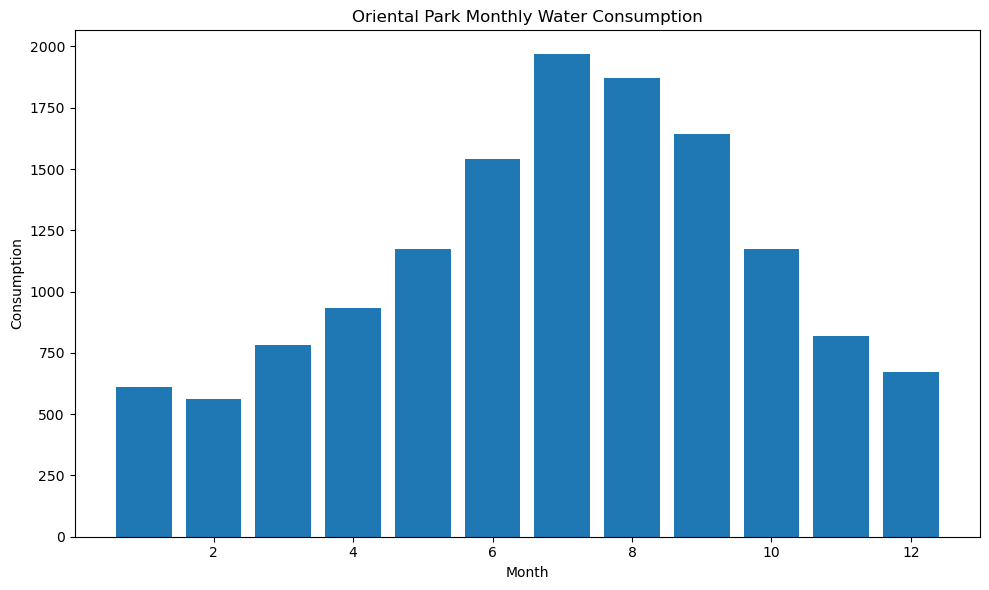

In [2]:
barPlotGenerateAlt_One(monthly_data, parkEdent)

## Create BarPlot - Alternative 2

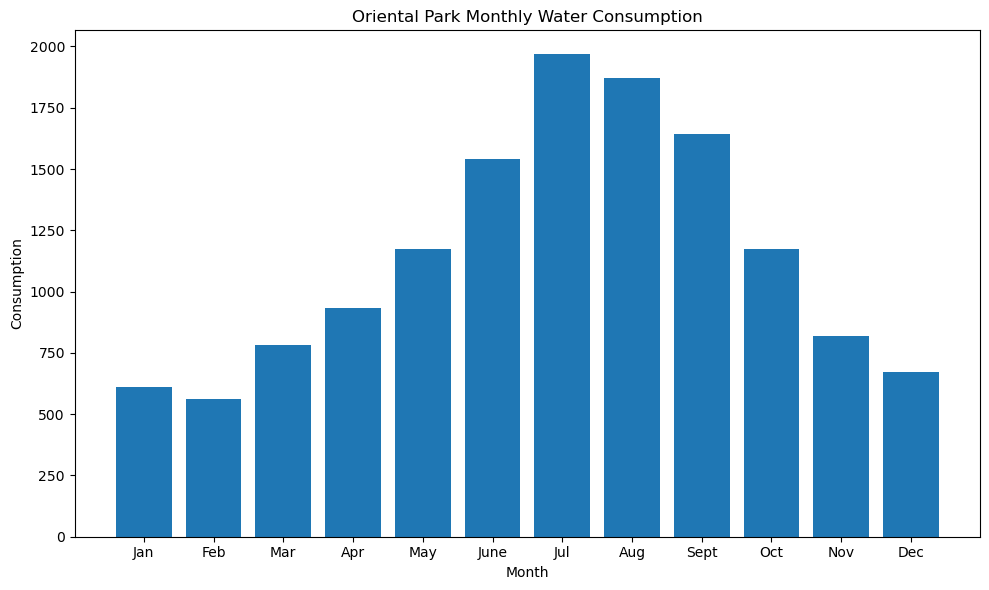

In [3]:
barPlotGenerateAlt_Two(monthly_data, parkEdent)

## Total Costs

In [4]:
us9_2()

Number of Parks: 2
(1) Park identification: Oriental
(2) Park identification: Cidade
       Park     Cost
0    CIDADE  2739.64
1  ORIENTAL   759.31
----------------------------
Total Cost: 3498.95


## Consumption Statistics for the Park


Consumption Statistics for the Park (Cidade):
Statistic | Value
----------------------------------
Mean                    | 116.24
Median                  | 86.00 
Standard Deviation      | 71.72 
Coefficient of Skewness | 3.99  

Consumption Statistics for the Park (ArcaAgua):
Statistic | Value
--------------------------------
Mean                    | 9.00
Median                  | 6.77
Standard Deviation      | 4.85
Coefficient of Skewness | 2.16

Outliers detected:
        Park  Year  Month  Day  Consumption
509   Cidade  2023      4   29   491.400000
804   Cidade  2023      6   27   922.654688
2079  Cidade  2024      3    8   413.595000

Outliers detected:
          Park  Year  Month  Day  Consumption
261   ArcaAgua  2023      3    7    30.555000
651   ArcaAgua  2023      5   28    49.218750
1686  ArcaAgua  2023     12   21    25.352759
1821  ArcaAgua  2024      1   17    24.500000


Frequency Tables for the Park (Cidade):
Absolute Frequency Table:
Consumption Class
(0.0, 184.53

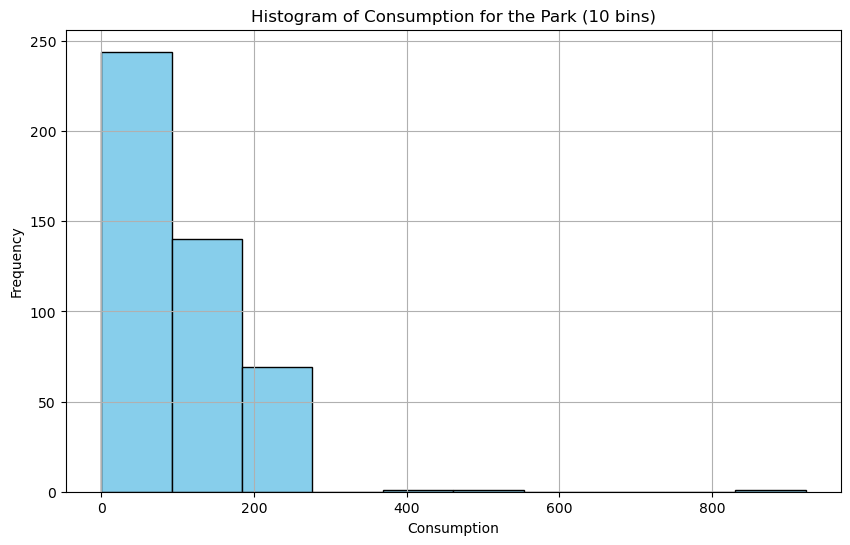

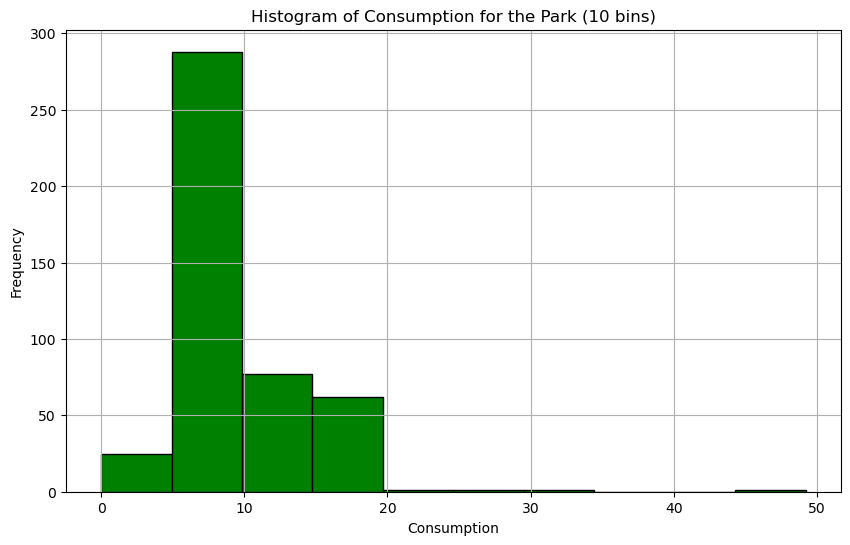

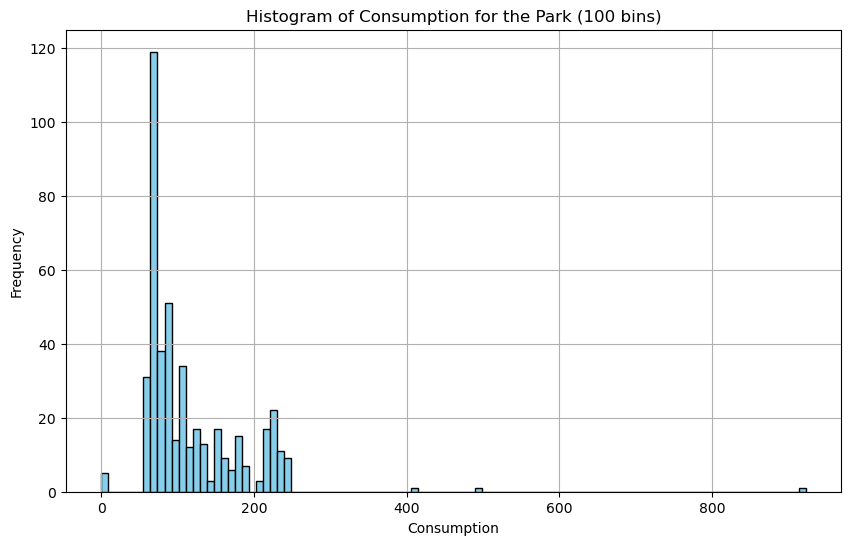

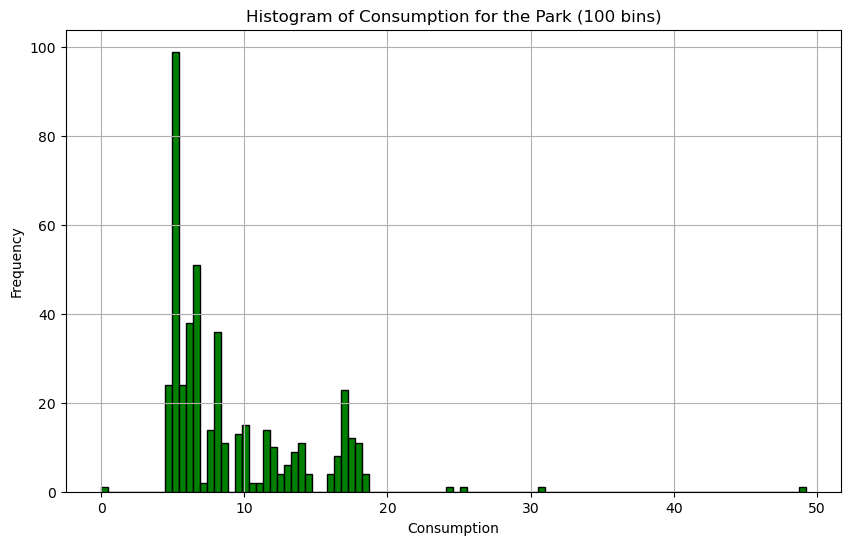

In [5]:
us9_3()

# Analysis and Interpretation of the Results.

#### Monthly Water Consumption for Park Oriental (2023):
The monthly water consumption for Park Oriental in the year 2023 shows an increasing trend from January to July, followed by a slight decrease until December. This could be due to seasonal variations in water usage, with higher consumption during warmer months or peak visitor seasons.

#### Average Monthly Costs:
The total cost for managing water consumption across the two parks (Oriental and Cidade) in 2023 is $3498.95. Park Cidade incurs significantly higher costs compared to Park Oriental.

#### Consumption Statistics for Park Cidade:
    Mean: The average monthly water consumption for Park Cidade is 116.24 m3.
    Median: The median consumption is lower than the mean, indicating that there are some high-consumption outliers.
    Standard Deviation: The data has a relatively high standard deviation of 71.72 m3, indicating variability in water usage.
    Coefficient of Skewness: The positive skewness (3.99) indicates that the distribution is highly skewed to the right, meaning there are more instances of high consumption.

#### Consumption Statistics for Park ArcaAgua:
    Mean: The average monthly water consumption for Park ArcaAgua is significantly lower at 9.00 m3.
    Median: Similar to Park Cidade, the median is lower than the mean, suggesting the presence of outliers.
    Standard Deviation: The standard deviation (4.85 m3) indicates less variability compared to Park Cidade.
    Coefficient of Skewness: The positive skewness (2.16) suggests a right-skewed distribution, although less pronounced compared to Park Cidade.

#### Outliers Detection:
    Park Cidade: Three outliers were detected, with notably high consumption on specific days.
    Park ArcaAgua: Four outliers were detected, indicating unusually high consumption on certain days.

#### Frequency Tables:
    Park Cidade: The absolute and relative frequency tables show that the majority of water consumption falls within the lower consumption classes, but there are instances of higher consumption.
    Park ArcaAgua: Similarly, most consumption falls within the lower classes, with fewer instances of higher consumption.

#### Interpretation:
    -Park Cidade: The high mean and positive skewness suggest that Park Cidade may have sporadic periods of high water usage, possibly due to events or maintenance activities. The presence of outliers further supports this observation.
    -Park ArcaAgua: Although the mean consumption is lower, the presence of outliers suggests that there are sporadic instances of high water usage in Park ArcaAgua as well, albeit to a lesser extent.

# US10 - As a GSM, I want to know which piece(s) of equipment is/are used in each day so that I can understand the users’ preferences.

# Introduction

In this US, we'll visualize park equipment usage based on data from 1000 users recorded in "EquipmentUsed.csv". By creating a pie chart, we'll represent the percentage of usage for amenities like walking trails, picnic areas, and exercise gymnastics equipment. This visualization will offer insights into visitor preferences and guide park management in optimizing amenities and enhancing visitor experiences.

# Code and Results

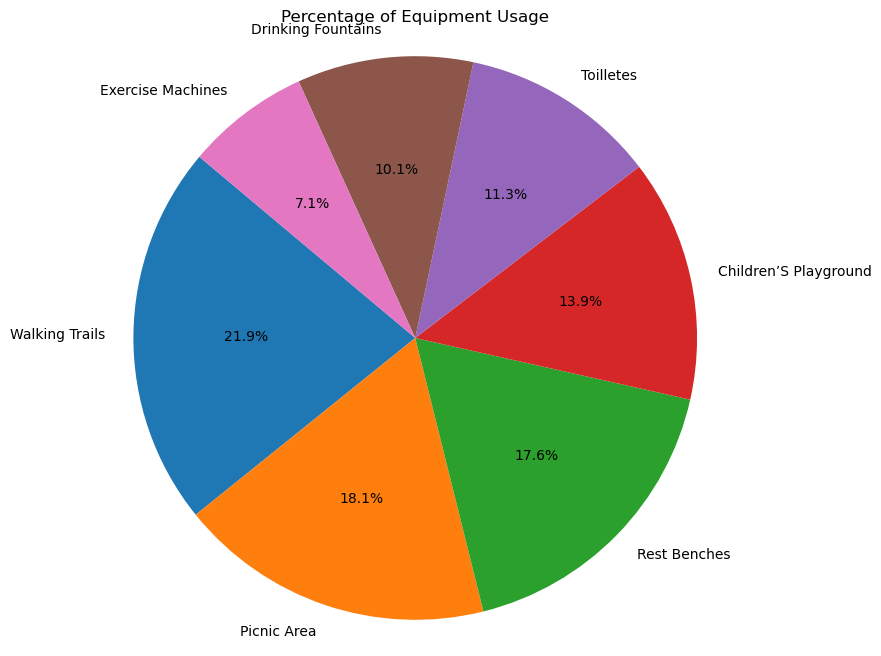

In [6]:
# Read the CSV file
data = pd.read_csv("EquipmentUsed.csv")

# Calculate the count of each equipment
equipment_counts = data.value_counts()

# Calculate the percentage of usage for each equipment
total_users = len(data)
equipment_percentages = (equipment_counts / total_users) * 100

# Remove single quotes and commas from equipment names, and capitalize the first letter of each word
cleaned_labels = [label[0].strip("'").replace(",", "").title() for label in equipment_percentages.index]

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(equipment_percentages, labels=cleaned_labels, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Equipment Usage")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Analysis and Interpretation of the Results.

The distribution of equipment usage among park visitors is as follows: exercise machines (7.1%), walking trails (21.9%), drinking fountains (10.1%), toilets (11.3%), children's playground (13.9%), rest benches (17.6%), and picnic areas (18.1%). These percentages reflect a preference for recreational activities like walking and picnicking. Park management can utilize this information to tailor amenities and improve visitor satisfaction.

# US11 - As a GSM, I want to be able to collect data from the user portal about the use of the park, so that I may understand the use of the park by different age groups.

# Introduction

User Story 11 (US11) focuses on understanding park usage across age groups through data collected via a three-question survey stored in "Inquiry.csv". The survey captures respondents' age range, park recommendation, and monthly visit frequency.

Key objectives include:

#### Age Group Analysis: 
    -Determine the proportion of park users in different age categories who would recommend the park.

#### Boxplot Visualization: 
    -Create boxplots for each age group to visualize monthly park visit frequency patterns.

Insights gained from this analysis will aid park management in tailoring strategies to meet the needs of diverse age demographics effectively.

# Code and Results

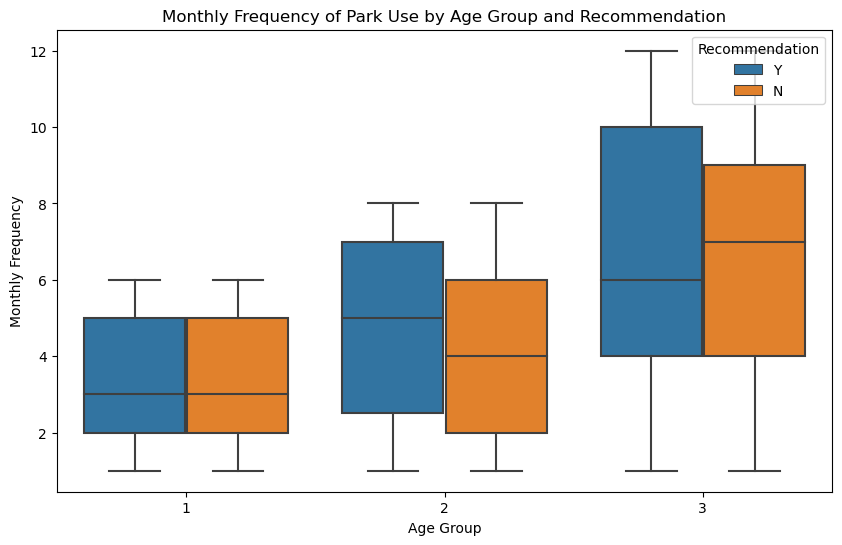

In [7]:
# Load the data
data = pd.read_csv("Inquiry.csv", sep=";")  
# Renomeie as colunas individualmente, se necessário

# Proporção de usuários que recomendariam o parque por faixa etária
recommendation_proportion = data.groupby('Escalao')['Y/N'].value_counts(normalize=True).unstack().fillna(0)

# Boxplot para a frequência mensal de uso do parque por faixa etária
plt.figure(figsize=(10, 6))
sns.boxplot(x='Escalao', y='Visits', hue='Y/N', data=data)
plt.title('Monthly Frequency of Park Use by Age Group and Recommendation')
plt.xlabel('Age Group')
plt.ylabel('Monthly Frequency')
plt.legend(title='Recommendation', loc='upper right')
plt.show()

# Analysis and Interpretation of the Results.

#### Age Group Influence on Recommendation:

    -Adults (Age Group 2) have the highest recommendation proportion (54.40%), followed by children (Age Group 1) at 47.33%, and seniors (Age Group 3) at 45.45%.
#### Park Satisfaction:

    -Overall, there's a balanced distribution between recommendations (Y) and non-recommendations (N) across age groups, indicating moderate satisfaction levels among visitors.
#### Targeting Strategies:

    -Focus on improving amenities or experiences may benefit children and seniors, where satisfaction levels are slightly lower compared to adults.
#### Further Investigation:

    -Qualitative research can help understand reasons behind recommendation differences, aiding in targeted improvements for enhanced park satisfaction and visitor experience.